In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split

### 1. Multi-class logistic regression with gradient descent

#### Load data

In [55]:
df = pd.read_csv('Iris.csv')
Y = df['Species'].values
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = X.values

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y, test_size = .4)
numTrain = X_train.shape[0]
numTest = X_test.shape[0]


#### Define functions

In [49]:
def softmax(u):
    expu = np.exp(u)
    return expu/np.sum(expu)

In [56]:
def multiLog_GD(X_train, Y_train, maxIter, alpha):    
    N, d = X_train.shape
    allOnes = np.ones((N,1))
    X_train_aug = np.hstack((allOnes, X_train))
    Y_oneHot = pd.get_dummies(Y_train).values
    K = Y_oneHot.shape[1]
    beta = np.random.randn(K,d+1)
    gradNorms =[]
    for idx in range(maxIter):
        grad = np.zeros((K,d+1))
        for i in range(N):
            XiHat = X_train_aug[i,:]
            Yi = Y_oneHot[i,:]
            u = beta @ XiHat #@ here means matrix multiplication in numpy
            Su = softmax(u)
            grad_i = np.zeros((K,d+1))
            for k in range(K):
                grad_i[k,:] = (Su[k] - Yi[k])*XiHat
            grad += grad_i
        beta = beta - alpha*grad
        nrm = np.linalg.norm(grad)
        gradNorms.append(nrm)
    return beta, gradNorms   


In [129]:
def accuracy(X_test,Y_test,beta,alpha):
    N_test = X_test.shape[0]
    allOnes_test = np.ones((N_test,1))
    X_test_aug = np.hstack((allOnes_test, X_test))
    numSuccess = 0
    for i in range(N_test):
        XiHat = X_test_aug[i,:]
        Yi = Y_test[i]
        u = beta @ XiHat
        Su = softmax(u)
        k = np.argmax(Su)
        if k == 0:
            pred = 'Iris-setosa'
        if k == 1:
            pred = 'Iris-versicolor'
        if k == 2:
            pred = 'Iris-verginica'
        if pred == Yi:
            numSuccess +=1
    accuracy = round(numSuccess/N_test,2)
    print('accuracy of learning rate ' + str(alpha) + ':' + str(accuracy))
    return accuracy

#### Run regression and test accuracy

In [87]:
from matplotlib.lines import Line2D

In [104]:
l1 = multiLog_GD(X_train,Y_train,maxIter = 1000, alpha = .0005)
l2 = multiLog_GD(X_train,Y_train,maxIter = 1000, alpha = .001)
l3 = multiLog_GD(X_train,Y_train,maxIter = 1000, alpha = .00002)
l4 = multiLog_GD(X_train,Y_train,maxIter = 1000, alpha = .0006)

In [130]:
a1 = accuracy(X_test, Y_test, beta = l1[0], alpha = .0005)
a2 = accuracy(X_test, Y_test, beta = l2[0], alpha = .001)
a3 = accuracy(X_test, Y_test, beta = l3[0], alpha = .00002)
a4 = accuracy(X_test, Y_test, beta = l4[0], alpha = .0006)

accuracy of learning rate 0.0005:0.67
accuracy of learning rate 0.001:0.68
accuracy of learning rate 2e-05:0.57
accuracy of learning rate 0.0006:0.65


In [117]:
l1[1][-1]

4.178384185923764

In [118]:
l2[1][-1]

2.176138764860418

In [119]:
l3[1][-1]

14.133385474177889

In [120]:
l4[1][-1]

3.5774213667577306

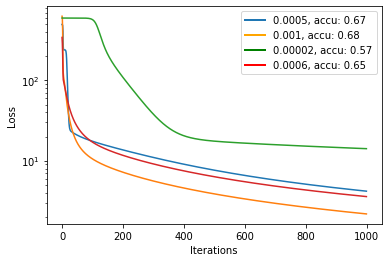

In [132]:
custom_lines = [Line2D([0], [0], color='C0', lw=2),
                Line2D([0], [0], color='orange', lw=2),
                Line2D([0], [0], color='green', lw=2),
                Line2D([0], [0], color='red', lw=2)]

fig, ax = plt.subplots()
plt.semilogy(l1[1])
plt.semilogy(l2[1])
plt.semilogy(l3[1])
plt.semilogy(l4[1])
plt.xlabel('Iterations')
plt.ylabel('Loss')
ax.legend(custom_lines, ['0.0005, accu: '+str(a1), '0.001, accu: '+str(a2), '0.00002, accu: '+str(a3), '0.0006, accu: '+str(a4)])

In [134]:
Y_train.shape

(90,)

### 2. Multi-class logistic regression with stochastic gradient descent

see Google colab: https://colab.research.google.com/drive/1x9jTe3Up54uR3w9buXwy1Nkf4Z-FMfAI

### 3. Training neural network

see Google colab: https://colab.research.google.com/drive/1x9jTe3Up54uR3w9buXwy1Nkf4Z-FMfAI